In [1]:
import numpy as np
import pandas as pd
import vega_datasets as vd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
sns.set_context('notebook')

In [2]:
df_diamonds = sns.load_dataset('diamonds')
df_titanic = sns.load_dataset('titanic')
df_gpm_lxp = vd.data('gapminder')
df_cars = vd.data('cars') # https://rstudio-pubs-static.s3.amazonaws.com/61800_faea93548c6b49cc91cd0c5ef5059894.html
df_flights = vd.data('flights_5k')
df_taxis = sns.load_dataset('taxis')

# Anscombe's Quartet for Correlation Analysis
---

In [3]:
anscombe = sns.load_dataset("anscombe")

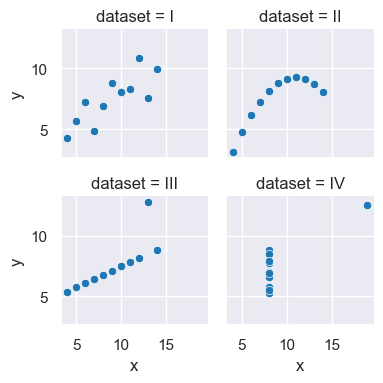

In [18]:
sns.relplot(data=anscombe, x='x', y='y', col='dataset', col_wrap=2, height=2)

In [21]:
anscombe.groupby('dataset').apply(lambda fr: fr[['x', 'y']].corr().loc['x', 'y'], include_groups=False)

dataset
I      0.816421
II     0.816237
III    0.816287
IV     0.816521
dtype: float64

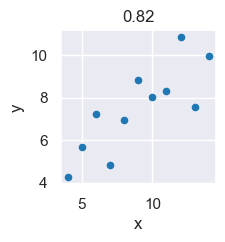

In [13]:
df_1 = anscombe.query("dataset == 'I'")
df_1.plot.scatter(x='x', y='y', title=f"{df_1[['x', 'y']].corr().loc['x', 'y']:.2f}", figsize=(2, 2));

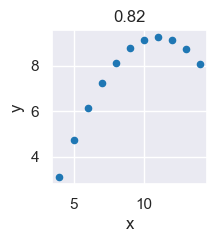

In [14]:
df_2 = anscombe.query("dataset == 'II'")
df_2.plot.scatter(x='x', y='y', title=f"{df_2[['x', 'y']].corr().loc['x', 'y']:.2f}", figsize=(2, 2));

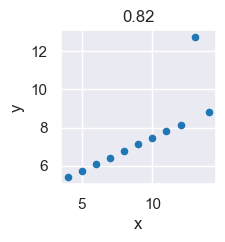

In [15]:
df_3 = anscombe.query("dataset == 'III'")
df_3.plot.scatter(x='x', y='y', title=f"{df_3[['x', 'y']].corr().loc['x', 'y']:.2f}", figsize=(2, 2));

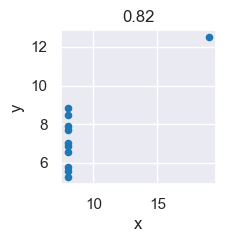

In [16]:
df_4 = anscombe.query("dataset == 'IV'")
df_4.plot.scatter(x='x', y='y', title=f"{df_4[['x', 'y']].corr().loc['x', 'y']:.2f}", figsize=(2, 2));

<img src="assets/Correl.png">

## Correlation between 2 numeric variables

---



- Cars data
- [Variables definition](https://rstudio-pubs-static.s3.amazonaws.com/61800_faea93548c6b49cc91cd0c5ef5059894.html)


In [3]:
df_cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


<br>

<p style="font-weight: bold; font-size: large">Start by making a scatterplot</p>

- Use `pandas.plot.scatter`
- Use `sns.relplot`

<br>

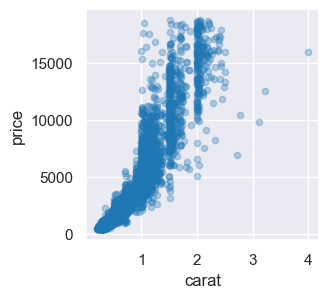

In [44]:
df_diamonds.sample(5000).plot.scatter(x='carat', y='price', figsize=(3, 3), alpha=0.3);

In [42]:
(df_diamonds
    .loc[:, ['carat', 'price']]
    .corr()
    .round(2)
    .loc['carat', 'price']
)

np.float64(0.92)

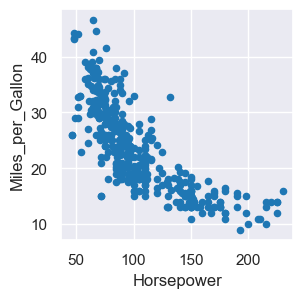

In [26]:
df_cars.plot.scatter(x='Horsepower', y='Miles_per_Gallon', figsize=(3, 3));

In [35]:
(df_cars
    .loc[:, ['Horsepower', 'Miles_per_Gallon']]
    .corr()
    .round(2)
    .loc['Horsepower', 'Miles_per_Gallon']
)

np.float64(-0.78)

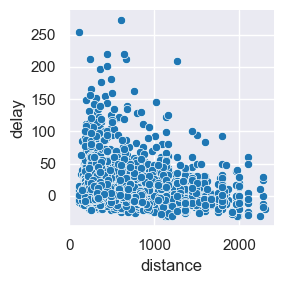

In [28]:
sns.relplot(data=df_flights, x='distance', y='delay', height=3)

In [34]:
(df_flights
    .loc[:, ['distance', 'delay']]
    .corr()
    .round(2)
    .loc['distance', 'delay']
)

np.float64(-0.04)

<br>

<p style="font-weight: bold; font-size: large">We observe that there's a medium-to-strong negative correlation for all 3 groups</p>
<p style="font-weight: bold; font-size: large">But is there a source of variance in the data? Let's look deeper ...</p>

- use the `hue=` option to color points on a scatterplot using a categorical variable

<br>

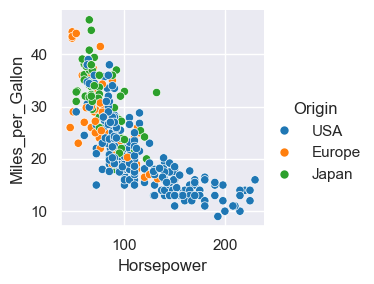

In [49]:
sns.relplot(data=df_cars, x='Horsepower', y='Miles_per_Gallon', hue="Origin",  height=3);

<br>

<p style="font-weight: bold; font-size: large">There seems to be some underlying variance.</p>
<p style="font-weight: bold; font-size: large">Let's separate them out.</p>

- Use the `col=` option of `relplot` to specify the varible for creating columns of charts

<br>

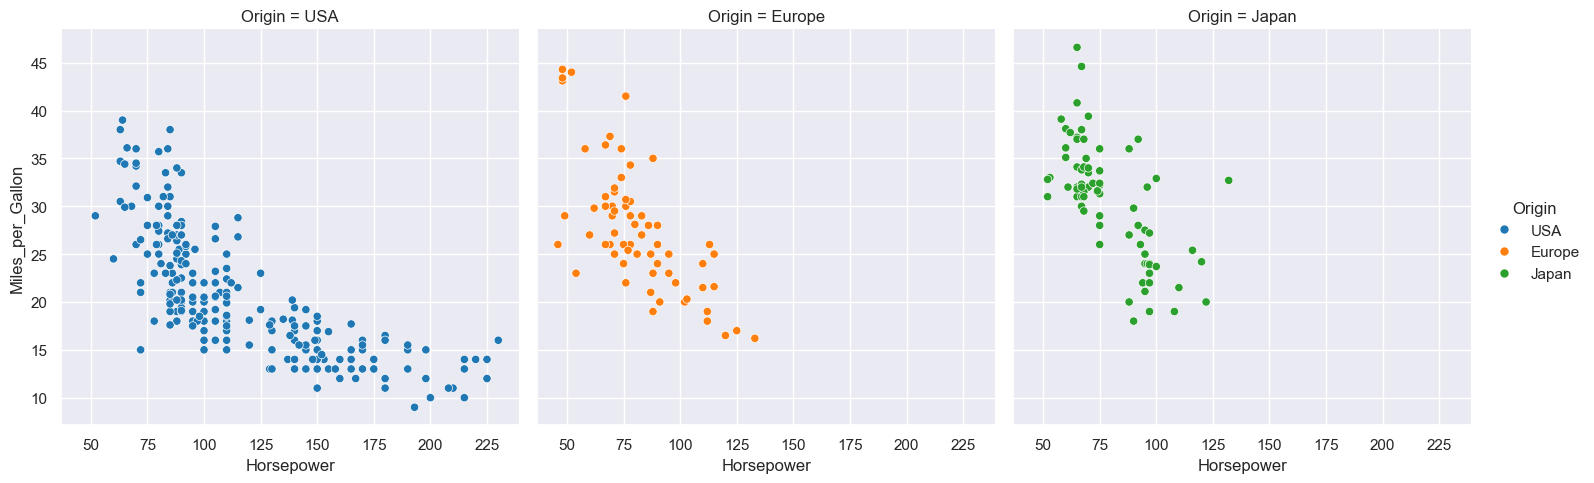

In [51]:
sns.relplot(data=df_cars, x='Horsepower', y='Miles_per_Gallon', hue="Origin", col="Origin");

In [ ]:
import seaborn as sns
df_diamonds = sns.load_dataset('diamonds')
df_diamonds.sample(1000)

# Make a scatter plot of x=CARAT  y=PRICE
# Color the points using clarity or cut or color and the hue= option
# make separate charts
# Report what you see

# If you finish, plot.scatter (whichever you didn't use already)

In [ ]:
dia = df_diamonds.sample(1000)

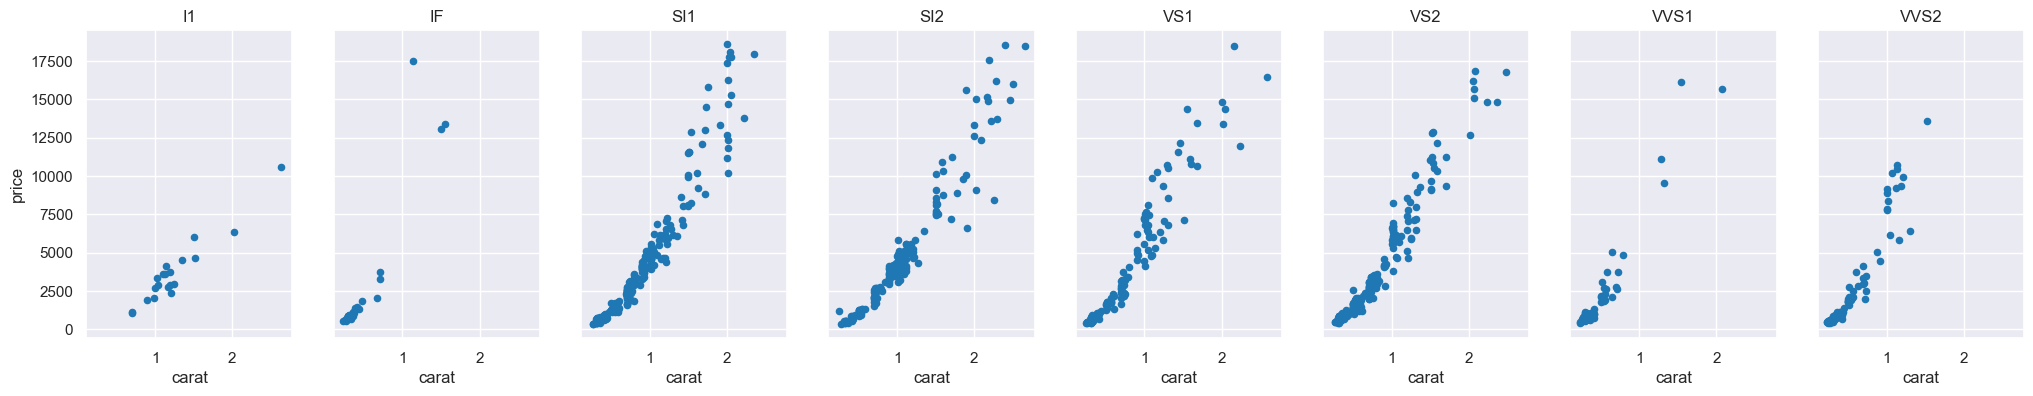

In [69]:
fig, axs = plt.subplots(1, 8, figsize=(25, 4), sharey=True, sharex=True)
for n,clarity in enumerate(sorted(dia.clarity.unique())):
    dia.query(f"clarity=='{clarity}'").plot.scatter(x='carat', y='price', title=clarity, ax=axs[n])

In [66]:
sorted(dia.loc[:, 'clarity'].unique())

['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']

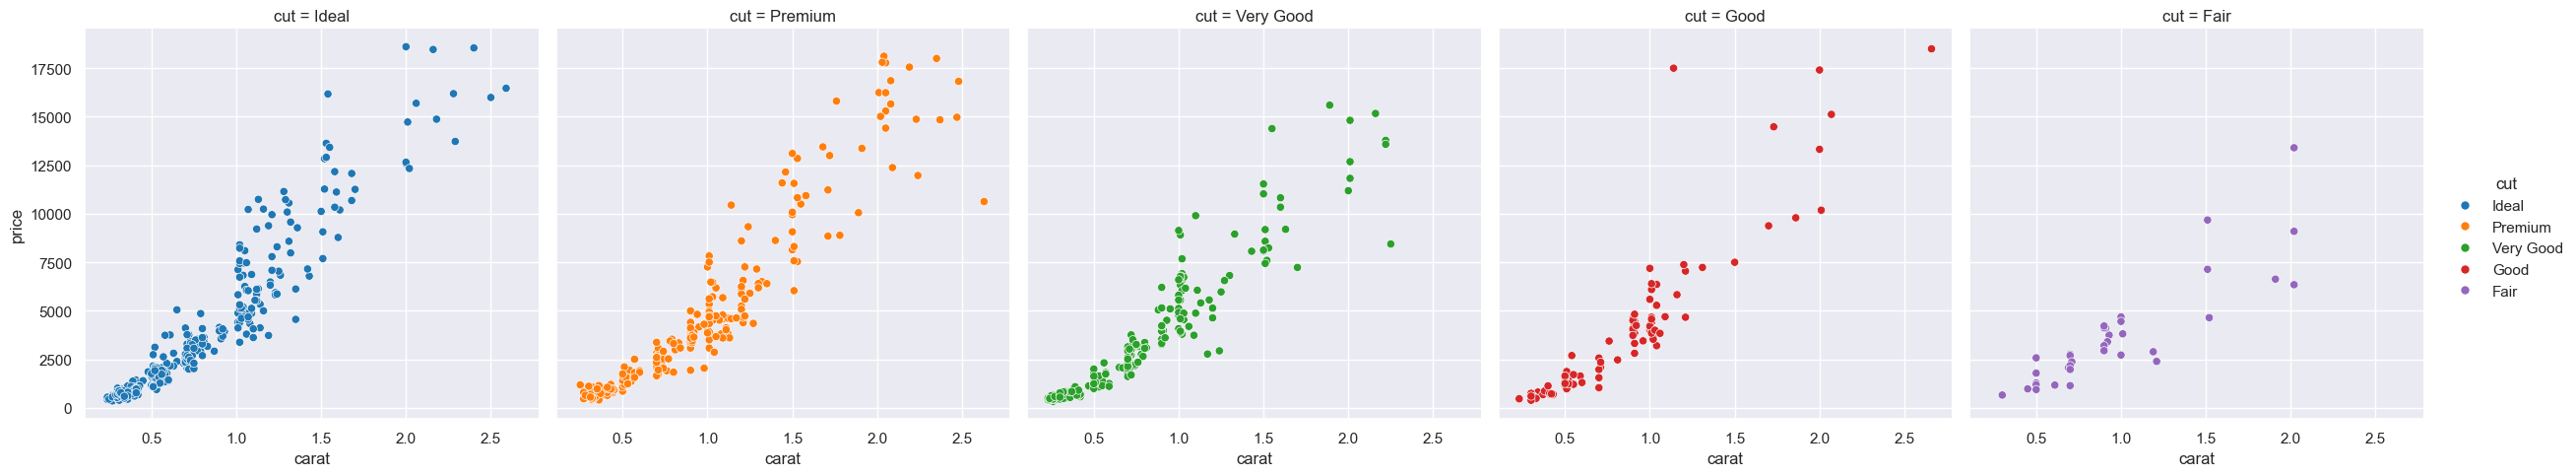

In [72]:
sns.relplot(data=dia, 
            x='carat', 
            y='price', 
            col='cut', 
            hue='cut');

<br>

<p style="font-weight: bold; font-size: large">Let's calculate the correlation values using pandas</p>

<br>

In [7]:
(df_cars
 .groupby('Origin')
 .apply(lambda fr: fr[['Horsepower', 'Miles_per_Gallon']].corr().loc['Horsepower', :], include_groups=False)
 .loc[:, 'Miles_per_Gallon']
 .round(2)
)

Origin
Europe   -0.68
Japan    -0.67
USA      -0.75
Name: Miles_per_Gallon, dtype: float64

In [71]:
(df_diamonds
 .groupby('clarity', observed=False )
 .apply(lambda fr: fr[['carat', 'price']].corr().loc['carat', :], include_groups=False)
 .loc[:, 'price']
 .round(2)
)

clarity
IF      0.93
VVS1    0.94
VVS2    0.95
VS1     0.95
VS2     0.95
SI1     0.96
SI2     0.95
I1      0.95
Name: price, dtype: float64

<br>

## Using `pairplot` to visualize multiple variables at once
---

<p style="font-weight: bold; font-size: large">Shows both Univariate distributions and bivariate relationships</p>


In [8]:
df_taxis.loc[:, ["distance", "fare", "tip"]].head()

,distance,fare,tip
0,1.60,7.0,2.15
1,0.79,5.0,0.00
2,1.37,7.5,2.36
3,7.70,27.0,6.15
4,2.16,9.0,1.10


<br>

<p style="font-weight: bold; font-size: large">One would assume that tipping would be proportional to the distance and fare</p>

- Or, in other words, positively correlated

<br>

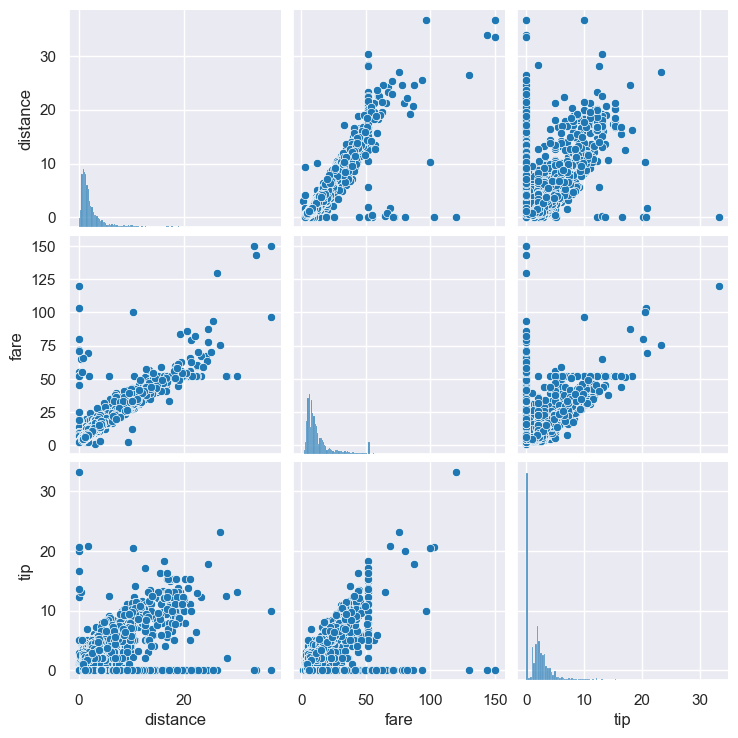

In [9]:
sns.pairplot(data=df_taxis.loc[:, ["distance", "fare", "tip"]]);

<br>

<p style="font-weight: bold; font-size: large">Correlation Matrix</p>

<br>

In [73]:
df_corr = df_taxis.loc[:, ["distance", "fare", "tip"]].corr()

In [74]:
df_corr.round(2)

,distance,fare,tip
distance,1.00,0.92,0.45
fare,0.92,1.00,0.49
tip,0.45,0.49,1.00


In [78]:
(pd.DataFrame(data=np.triu(df_corr), 
              index=df_corr.index, 
              columns=df_corr.columns)
    .round(2)
    .replace(1, '')
    .replace(0, ''))

,distance,fare,tip
distance,,0.92,0.45
fare,,,0.49
tip,,,


<br>

- We see that there's only a weak correlation between tip x distance and also tip x fare
- Distance and fare are obviously highly correlated


<p style="font-weight: bold; font-size: large">Let's make a Correlation Heatmap</p>

- Default
- Better than default

<br>

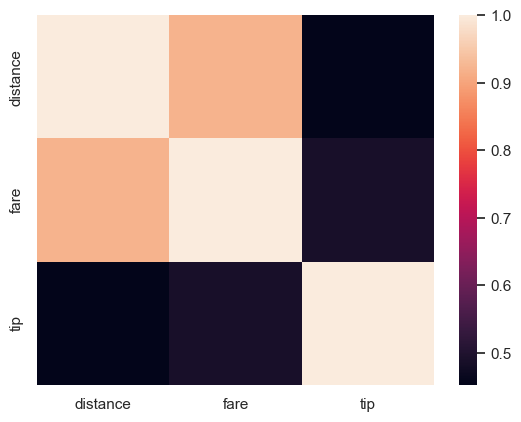

In [80]:
sns.heatmap(data=df_corr,);

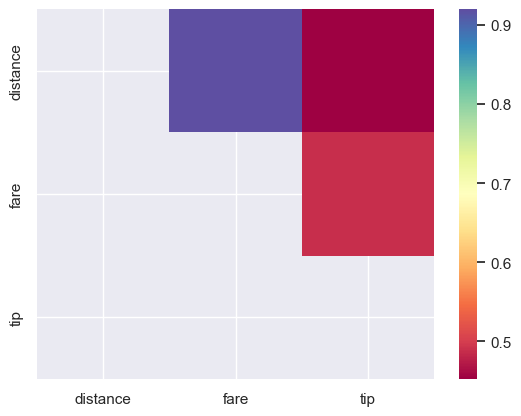

In [83]:
sns.heatmap(data=df_corr, mask=np.tril(df_corr), cmap='Spectral');

<br>

## Linear Regression
---

<p style="font-weight: bold; font-size: large">What impacts the price of diamonds?</p>

- If a variable of interest (dependent) is correlated with independent variables, we can quantify this relationship in a linear model

<br>

In [84]:
df_corr_diamonds = df_diamonds.select_dtypes(include=np.number).corr()
df_corr_diamonds_clean = pd.DataFrame(data=np.tril(df_corr_diamonds), 
                                      index=df_corr_diamonds.index,
                                      columns=df_corr_diamonds.columns).round(2)
df_corr_diamonds_clean.replace(0, '').replace(1, '')

,carat,depth,table,price,x,y,z
carat,,,,,,,
depth,0.03,,,,,,
table,0.18,-0.3,,,,,
price,0.92,-0.01,0.13,,,,
x,0.98,-0.03,0.2,0.88,,,
y,0.95,-0.03,0.18,0.87,0.97,,
z,0.95,0.09,0.15,0.86,0.97,0.95,


<Axes: >

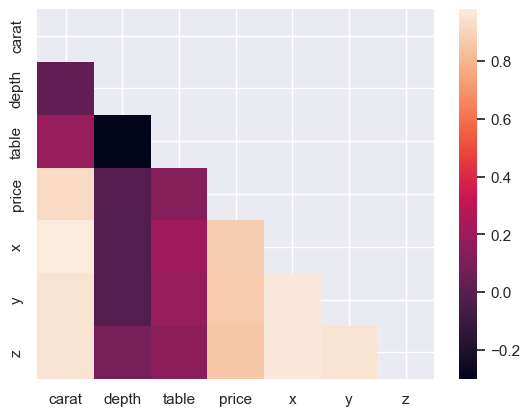

In [16]:
sns.heatmap(data=df_corr_diamonds_clean.replace(1, np.nan).replace(0, np.nan))

In [17]:
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [87]:
df_dia = df_diamonds.sample(n=500)

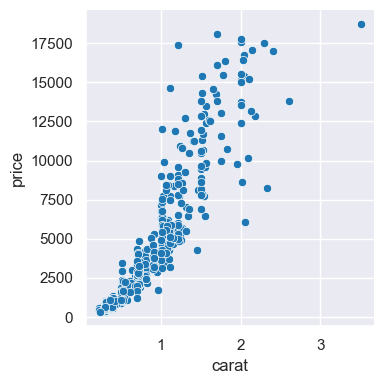

In [88]:
sns.relplot(data=df_dia, x='carat', y='price', height=4);

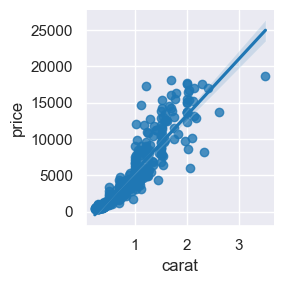

In [90]:
sns.lmplot(data=df_dia, x='carat', y='price', height=3);

<Axes: xlabel='carat', ylabel='price'>

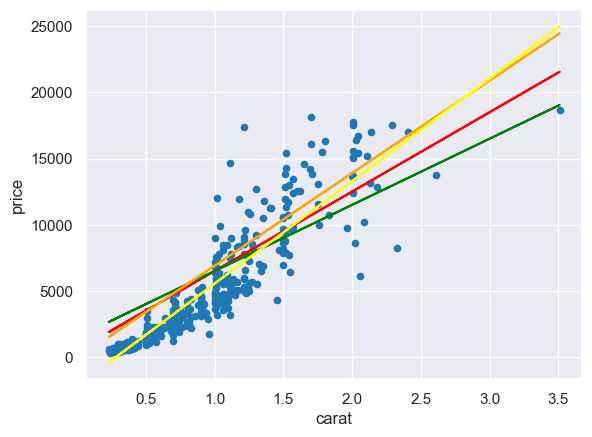

In [154]:
ax = df_dia.plot.scatter(x='carat', y='price')
pd.Series(data=df_dia['carat'].values, index=df_dia['carat']).multiply(6000).add(500).plot(ax=ax, color='red')
pd.Series(data=df_dia['carat'].values, index=df_dia['carat']).multiply(5000).add(1500).plot(ax=ax, color='green')
pd.Series(data=df_dia['carat'].values, index=df_dia['carat']).multiply(7000).add(-100).plot(ax=ax, color='orange')
pd.Series(data=df_dia['carat'].values, index=df_dia['carat']).multiply(7744).add(-2195).plot(ax=ax, color='yellow')

# y = x * slope + intercept
# y = x * 6000 + 500
# y = x * 5000 + 1500

In [ ]:
RESIDUAL = ACTUAL - PREDICTED

<Axes: >

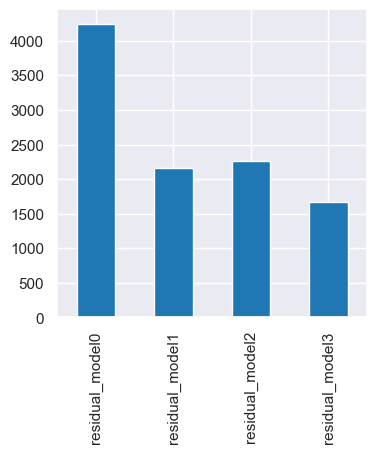

In [155]:
(df_dia[['carat', 'price']]
    .rename(columns={'carat': 'x_carat', 'price': 'y_price'})
 .assign(y_model0=lambda fr: fr['y_price'].mean())
 .assign(y_model1=lambda fr: fr['x_carat'].multiply(5000).add(100))
 .assign(y_model2=lambda fr: fr['x_carat'].multiply(6000).add(500))
 .assign(y_model3=lambda fr: fr['x_carat'].multiply(7744).add(-2195))
 .set_index('x_carat')
 .eval("residual_model0 = y_model0 - y_price")
 .eval("residual_model1 = y_model1 - y_price")
 .eval("residual_model2 = y_model2 - y_price")
 .eval("residual_model3 = y_model3 - y_price")
 .loc[:, 'residual_model0':]
 .map(np.square)
 .mean()
 .map(np.sqrt)
 .plot.bar(figsize=(4, 4))
)

<br>

<p style="font-weight: bold; font-size: large">With scikit</p>

<br>

In [147]:
X = df_dia.loc[:, ['carat']]
y = df_dia.loc[:, ['price']]

In [148]:
from sklearn.linear_model import LinearRegression

In [149]:
lr = LinearRegression() # define the object of LinearRegression class/type

In [150]:
lr.fit(X, y) # use the .fit method of the object created

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [169]:
lr.coef_[0][0] # beta, or the slope 

np.float64(7744.199765341089)

In [170]:
lr.intercept_[0]

np.float64(-2195.5720867818527)

In [ ]:
# our model
# y = -2195 + x * 7744

In [165]:
df_dia_modeled = (df_dia[['carat', 'price']]
    .eval("price_predicted = (carat * 7744) - 2195")
    .eval("residual = price_predicted - price"))

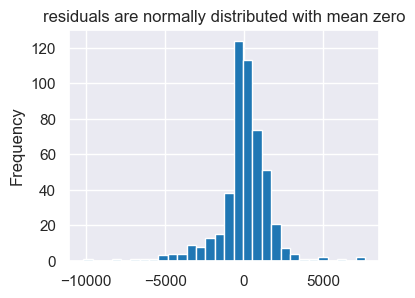

In [171]:
(df_dia_modeled
    .loc[:, 'residual']
 .plot
 .hist(bins=30, title='residuals are normally distributed with mean zero', figsize=(4, 3))
);

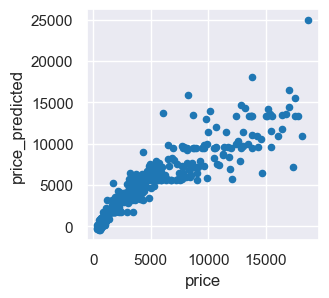

In [172]:
df_dia_modeled.plot.scatter(x='price', y='price_predicted', figsize=(3, 3));

In [177]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [185]:
pd.DataFrame(X_scaled, columns=['carat_scaled'])['carat_scaled'].describe().round(2)

count    500.00
mean      -0.00
std        1.00
min       -1.18
25%       -0.84
50%       -0.23
75%        0.55
max        5.33
Name: carat_scaled, dtype: float64

In [186]:
df_dia['carat'].describe().round(2)

count    500.00
mean       0.82
std        0.50
min        0.23
25%        0.40
50%        0.71
75%        1.10
max        3.51
Name: carat, dtype: float64

In [187]:
lr.fit(X_scaled, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [188]:
print(f"The coefficient of the model is: {lr.coef_[0][0]:.2f}")
print(f"The intercept of the model is: {lr.intercept_[0]:.2f}")

print(f"The model is: Price = {lr.coef_[0][0]:.2f} * Carat + {lr.intercept_[0]:.2f}")

The coefficient of the model is: 3900.49
The intercept of the model is: 4181.00
The model is: Price = 3900.49 * Carat + 4181.00


<br>

<p style="font-weight: bold; font-size: large">Residuals should be Normally Distributed with Mean 0</p>

<br>

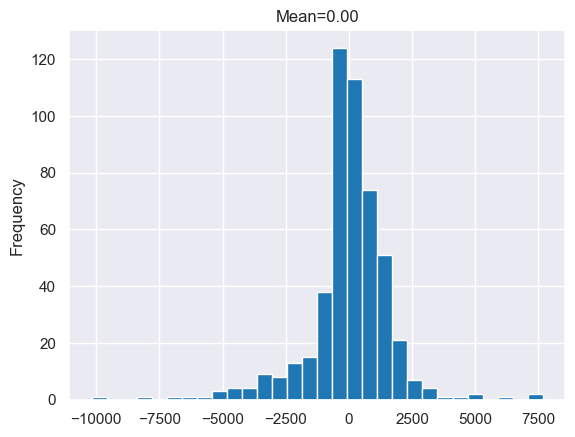

In [189]:
srs_residuals = \
(df_dia[['carat', 'price']]
 .assign(predicted_price=lambda fr: lr.intercept_[0] + scaler.fit_transform(fr[['carat']]) * lr.coef_[0][0])
 .assign(residual=lambda fr: fr['predicted_price'] - fr['price'])
 .loc[:, 'residual']
)

srs_residuals.plot.hist(bins=30, title=f"Mean={srs_residuals.mean():.2f}");

<br>

<p style="font-weight: bold; font-size: large">With Statsmodels</p>

<br>

In [190]:
import statsmodels.api as sm

lr_0 = sm.OLS(endog=y.values, exog=sm.add_constant(X_scaled)).fit()
lr_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     2732.
Date:                Mon, 27 Oct 2025   Prob (F-statistic):          2.59e-204
Time:                        18:27:23   Log-Likelihood:                -4418.4
No. Observations:                 500   AIC:                             8841.
Df Residuals:                     498   BIC:                             8849.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4181.0020     74.626     56.026      0.000    4034.381    4327.623
x1          3900.4855     74.626     52.267      0.000    3753.865    4047.106
==============================================================================
Omnibus:                      131.073   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1096.338
Skew:                           0.885   Prob(JB):                    8.58e-239
Kurtosis:                      10.035   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<br>

<p style="font-weight: bold; font-size: large">The R-squared is: 0.85 <br> Not bad for our first model!</p>

<br>

<br>

# Multivariate Regression
---

- Could there be other variables affecting the regression?

<br>

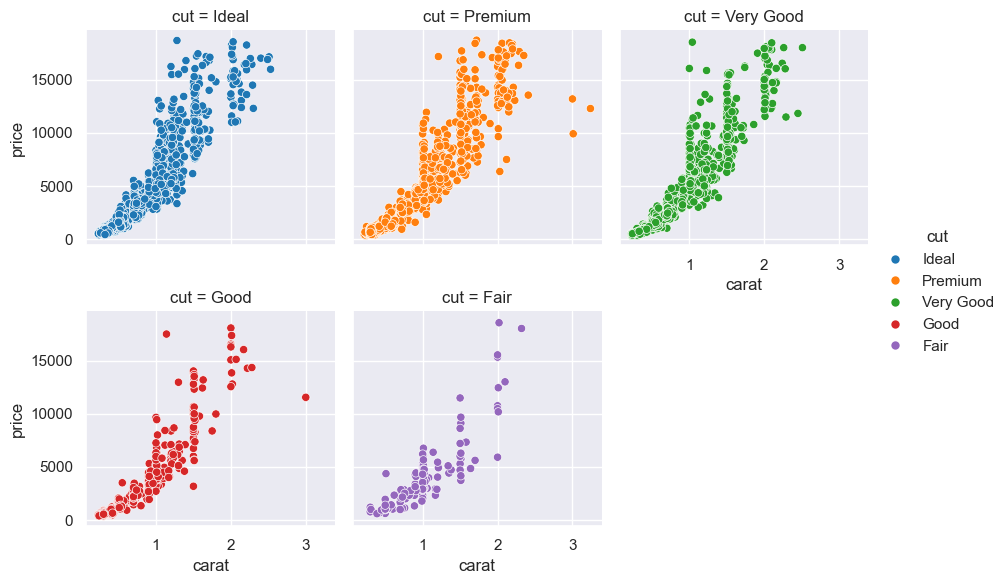

In [28]:
sns.relplot(data=df_dia, x='carat', y='price', hue='cut', col='cut', col_wrap=3, height=3);

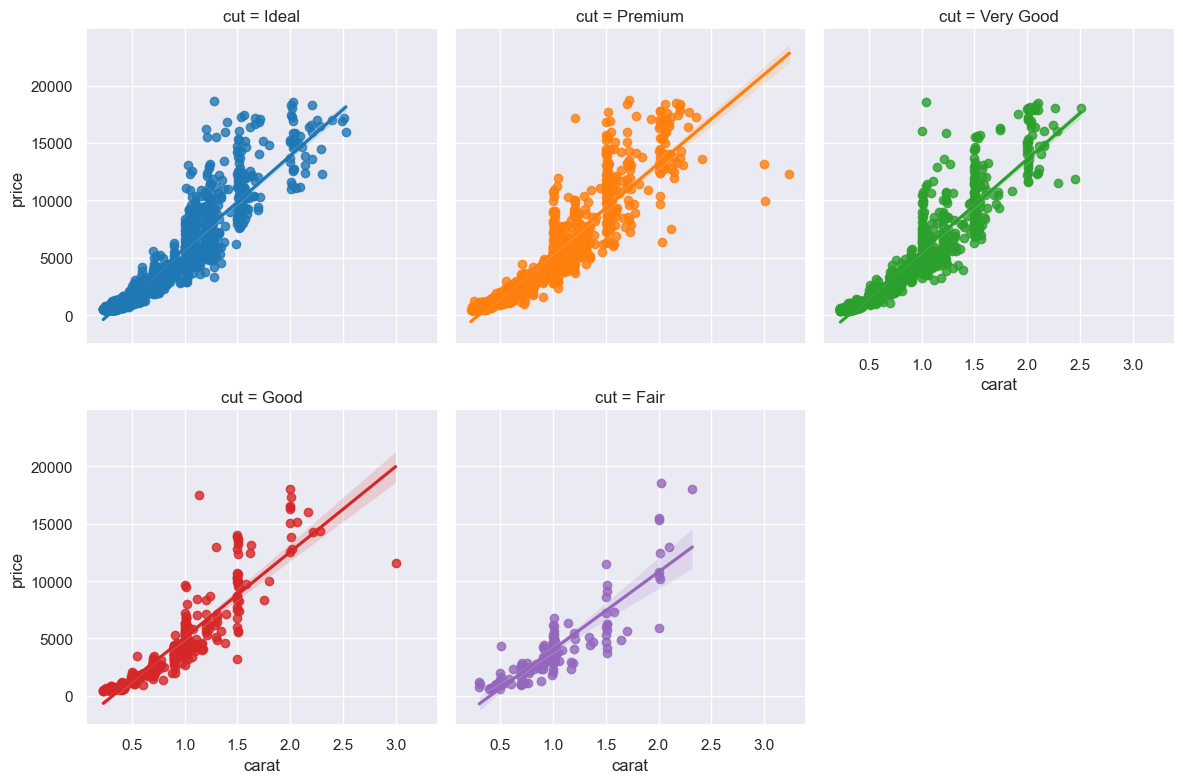

In [30]:
# po = 
sns.lmplot(data=df_dia, x='carat', y='price', hue='cut', col='cut', col_wrap=3, height=4)
# po.ax.set_ylim(0, 5)